# Sarcasm Detector



> **PROJECT DESCRIPTION**



The main purpose of this project is to build and identify the best AI-powered systems to detect Sarcasm from the news headlines. 



> **METHOD**



Binary classification coded as 1: sarcasm, 0: non-sarcasm, leveraging Natural Language Processing (NLP) & Deep Learning for NLP. 

I start from testing the most basic NLP model of Logistic regression to Bert to see which model gives the most accurate prediction of sarcasm in the newshead lines. 



> **DATA**



News Headlines dataset for Sarcasm Detection is collected from two news websites. TheOnion aims at producing sarcastic versions of current. Real (and non-sarcastic) news headlines are collected from HuffPost.




## DATA PREPARATION##

In [1]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.4
    Uninstalling gdown-4.6.4:
      Successfully uninstalled gdown-4.6.4


In [2]:
!gdown --id 1ytPDo88FEC2ArOjdqErAiarAZBNJzEJz

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ytPDo88FEC2ArOjdqErAiarAZBNJzEJz
To: /content/SarcasmDetect.json
100% 6.06M/6.06M [00:00<00:00, 15.7MB/s]


In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 21.7 MB/s eta 0:00:00


In [4]:
!pip install contractions
!pip install textsearch
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 11.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
#DATA PREPARATION --------------------------------------------------------
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from collections import Counter
#DATA PREPROCESSING------------------------------------------------------ 
import nltk
import contractions
import re
import tqdm
#MODEL PREPARATION -------------------------------------------------------
from tensorflow import keras
import transformers

#EVALUATION---------------------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
import tensorflow_hub as hub
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
# DATA LOAD
df = pd.read_json('./SarcasmDetect.json', lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [7]:
df = df[['headline', 'is_sarcastic']]

## Remove all records with no headline text

In [8]:
df = df[df['headline'] != '']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28619 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      28619 non-null  object
 1   is_sarcastic  28619 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 670.8+ KB


In [9]:
#Data is relatively balanced. 
df['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

## DATA PREPARATION ##

In [10]:
# DATA SPLIT 
X=df.drop(columns=['is_sarcastic'])
y=df['is_sarcastic']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42, test_size=0.3)
X_train.shape, X_test.shape

((14023, 1), (8586, 1))

In [ ]:
X.shape

(28619, 1)

In [ ]:
y

0        1
1        0
2        0
3        1
4        1
        ..
28614    1
28615    1
28616    0
28617    1
28618    1
Name: is_sarcastic, Length: 28619, dtype: int64

In [ ]:
Counter(y_train), Counter(y_test)

(Counter({0: 10530, 1: 9503}), Counter({0: 4455, 1: 4131}))

In [ ]:
y_train[:3]

12170    0
28552    0
6883     1
Name: is_sarcastic, dtype: int64

## TEXT PREPROCESSING ##

In [11]:

def normalize_document(doc):
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', ' ', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()  

    return doc

def normalize_corpus(docs):
    norm_docs = []
    for doc in tqdm.tqdm(docs):
        norm_doc = normalize_document(doc)
        norm_docs.append(norm_doc)

    return norm_docs

X_train= normalize_corpus(X_train['headline'].values)
X_test = normalize_corpus(X_test['headline'].values)
X_valid = normalize_corpus(X_valid['headline'].values)

100%|██████████| 6010/6010 [00:00<00:00, 60760.05it/s]


As the next step, it is important to check how we should define the maximum number of the words in each row for the complex models later on. For this, we check the data distribution of the Training Data with the Data Visualization.

(0.0, 25.0)

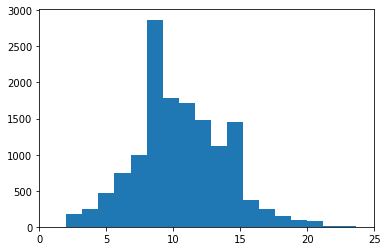

In [12]:
#DATA DISTRIBUTION CHECK
t=tf.keras.preprocessing.text.Tokenizer(oov_token='<UNK>')
t.fit_on_texts(X_train)
t.word_index['<PAD>'] = 0
train_sequences = t.texts_to_sequences(X_train)
test_sequences = t.texts_to_sequences(X_test)

#PLOT
plt.hist([len(item) for item in train_sequences], bins=30);
plt.xlim([0,25])

Based on the above graph, it is concluded that the maximun length of the words in each row does not go beyond 25

# BASELINE MODEL : LOGISTIC REGRESSION#

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=False) # how many times for the word to be counted.model complexity. 

cv_train_features = cv.fit_transform(X_train)
cv_test_features = cv.transform(X_test)
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (20033, 21128)  Test features shape: (8586, 21128)


In [ ]:
%%time

# Logistic Regression model on BOW features
from sklearn.linear_model import LogisticRegression

# instantiate model
lr = LogisticRegression(penalty='l2', max_iter=500, C=1, solver='lbfgs', random_state=42)

# train model
lr.fit(cv_train_features, y_train)

# predict on test data
lr_bow_predictions = lr.predict(cv_test_features)

CPU times: user 533 ms, sys: 907 ms, total: 1.44 s
Wall time: 768 ms


In [ ]:
print(classification_report(y_test, lr_bow_predictions))
pd.DataFrame(confusion_matrix(y_test, lr_bow_predictions))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      4455
           1       0.74      0.65      0.69      4131

    accuracy                           0.72      8586
   macro avg       0.73      0.72      0.72      8586
weighted avg       0.73      0.72      0.72      8586



,0,1
0,3541,914
1,1463,2668


Conclusion: Logistic Regression model with vectorizer showed approximately 72 % of prediction accuracy. 

##FASTTEXT EMBEDDINGS WITH CNN##

In [ ]:
t = tf.keras.preprocessing.text.Tokenizer(oov_token='<UNK>')
# fit the tokenizer on the documents
t.fit_on_texts(X_train['headline'])
t.word_index['<PAD>'] = 0

print(max([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), 
      min([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), 
      t.word_index['<UNK>'])

('archaeologist', 22131) ('<PAD>', 0) 1


In [ ]:
train_sequences = t.texts_to_sequences(X_train['headline'])
test_sequences = t.texts_to_sequences(X_test['headline'])
val_sequences = t.texts_to_sequences(X_valid['headline'])

In [ ]:
MAX_SEQUENCE_LENGTH = 25

# pad dataset to a maximum review length in words
X_train = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train.shape, X_test.shape


X_val = tf.keras.preprocessing.sequence.pad_sequences(val_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
#LOAD the FUNCTIONS
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip
!unzip crawl-300d-2M-subword.zip


--2023-03-24 10:55:29--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.70, 13.227.219.33, 13.227.219.59, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5828358084 (5.4G) [application/zip]
Saving to: ‘crawl-300d-2M-subword.zip’

crawl-300d-2M-subwo 100%[===================>]   5.43G  19.2MB/s    in 3m 34s  

2023-03-24 10:59:04 (25.9 MB/s) - ‘crawl-300d-2M-subword.zip’ saved [5828358084/5828358084]

Archive:  crawl-300d-2M-subword.zip
  inflating: crawl-300d-2M-subword.vec  
  inflating: crawl-300d-2M-subword.bin  


In [ ]:
#BUILDING FASTTEXT 
VOCAB_SIZE = len(t.word_index)
EMBED_SIZE = 300
EPOCHS=100
BATCH_SIZE=128

In [ ]:
#PRETRAINED MODEL 
word2idx = t.word_index
FASTTEXT_INIT_EMBEDDINGS_FILE = './crawl-300d-2M-subword.vec'


def load_pretrained_embeddings(word_to_index, max_features, embedding_size, embedding_file_path):    
    
    def get_coefs(word,*arr): 
        return word, np.asarray(arr, dtype='float32')
    
    embeddings_index = dict(get_coefs(*row.split(" ")) 
                                for row in open(embedding_file_path, encoding="utf8", errors='ignore') 
                                    if len(row)>100)

    all_embs = np.stack(embeddings_index.values())
    emb_mean, emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]

    nb_words = min(max_features, len(word_to_index))
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embedding_size))
    
    for word, idx in word_to_index.items():
        if idx >= max_features: 
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None: 
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix


ft_embeddings = load_pretrained_embeddings(word_to_index=word2idx, 
                                           max_features=VOCAB_SIZE, 
                                           embedding_size=EMBED_SIZE, 
                                           embedding_file_path=FASTTEXT_INIT_EMBEDDINGS_FILE)
ft_embeddings.shape

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


(22132, 300)

In [ ]:
# MODEL ARCHITECTURE

# create the model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(VOCAB_SIZE, 
                                    EMBED_SIZE,
                                    weights=[ft_embeddings],
                                    trainable=True,
                                    input_length=MAX_SEQUENCE_LENGTH))

model.add(tf.keras.layers.Conv1D(filters=256, 
                                 kernel_size=4, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

model.add(tf.keras.layers.Conv1D(filters=128, 
                                 kernel_size=4, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

model.add(tf.keras.layers.Conv1D(filters=64, 
                                 kernel_size=4, 
                                 padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, 
                                activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(256, 
                                activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(1, 
                                activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',
                       tf.keras.metrics.Precision(), 
                       tf.keras.metrics.Recall()])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 300)          6639600   
                                                                 
 conv1d_15 (Conv1D)          (None, 500, 256)          307456    
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 250, 256)         0         
 g1D)                                                            
                                                                 
 conv1d_16 (Conv1D)          (None, 250, 128)          131200    
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 125, 128)         0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 125, 64)          

In [ ]:
#TRAIN / VALIDATE MODEL

# Fit the model
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      patience=10,
                                      restore_best_weights=True,
                                      verbose=1)

model.fit(X_train, y_train, 
          validation_data=(X_val, y_valid),
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          shuffle=True,
          callbacks=[es],
          verbose=1)

Epoch 1/100
110/110 [==============================] - 17s 132ms/step - loss: 0.5108 - accuracy: 0.7165 - precision_1: 0.7646 - recall_1: 0.5752 - val_loss: 0.3296 - val_accuracy: 0.8572 - val_precision_1: 0.8789 - val_recall_1: 0.8164
Epoch 2/100
110/110 [==============================] - 10s 91ms/step - loss: 0.2052 - accuracy: 0.9211 - precision_1: 0.9190 - recall_1: 0.9131 - val_loss: 0.3134 - val_accuracy: 0.8661 - val_precision_1: 0.8551 - val_recall_1: 0.8695
Epoch 3/100
110/110 [==============================] - 9s 83ms/step - loss: 0.0622 - accuracy: 0.9802 - precision_1: 0.9801 - recall_1: 0.9779 - val_loss: 0.4213 - val_accuracy: 0.8594 - val_precision_1: 0.8497 - val_recall_1: 0.8605
Epoch 4/100
110/110 [==============================] - 9s 83ms/step - loss: 0.0238 - accuracy: 0.9915 - precision_1: 0.9902 - recall_1: 0.9918 - val_loss: 0.6473 - val_accuracy: 0.8376 - val_precision_1: 0.9021 - val_recall_1: 0.7439
Epoch 5/100
110/110 [==============================] - 8s 76m

In [ ]:
#MODEL PERFORMANCE EVALUATION

predictions = model.predict(X_test, batch_size=2048, verbose=0).ravel()
predictions = [1 if prob > 0.5 else 0 for prob in predictions]
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions)*100))
print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

Accuracy: 86.15%
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4455
           1       0.86      0.85      0.86      4131

    accuracy                           0.86      8586
   macro avg       0.86      0.86      0.86      8586
weighted avg       0.86      0.86      0.86      8586



,0,1
0,3867,588
1,601,3530


Conclusion: The Fasttext CNN model showed the improvement in the prediction accuracy of 86 % regarding sarcasm detection for newsheadline.  

##NNLM : Neural Network Language Model

In [ ]:
# DATA SPLIT 
X=df.drop(columns=['is_sarcastic'])
y=df['is_sarcastic']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y )
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42, test_size=0.3, stratify=y_train_full)
X_train.shape, X_test.shape

((14023, 1), (8586, 1))

In [ ]:
def normalize_document(doc):
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', ' ', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()  

    return doc

def normalize_corpus(docs):
    norm_docs = []
    for doc in tqdm.tqdm(docs):
        norm_doc = normalize_document(doc)
        norm_docs.append(norm_doc)

    return norm_docs

X_train['headline']= normalize_corpus(X_train['headline'].values)
X_test['headline'] = normalize_corpus(X_test['headline'].values)
X_valid['headline'] = normalize_corpus(X_valid['headline'].values)

100%|██████████| 6010/6010 [00:00<00:00, 33765.00it/s]


In [ ]:
## EMBEDDING LAYER
model = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"


In [ ]:
hub_layer = hub.KerasLayer(model, output_shape=[128], input_shape=[], 
                           dtype=tf.string, trainable=True)
# print(hub_layer(np.array(norm_test_texts)[:3]))


In [ ]:
## BUILD MODEL ARCHITECTURE
model = tf.keras.models.Sequential()

model.add(hub_layer)

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 128)               124642688 
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 1)                 129       
                                                                 
Total params: 124,675,841
Trainable params: 124,675,84

In [ ]:
## MODEL FIT
EPOCHS=100
BATCH_SIZE=128

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      patience=10,
                                      restore_best_weights=True,
                                      verbose=1)
    
model.fit(np.array(X_train), y_train, 
          validation_data=(np.array(X_valid), y_valid),
          # class_weight='balanced',
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          shuffle=True,
          callbacks=[es],
          verbose=1)

Epoch 1/100
110/110 [==============================] - 16s 126ms/step - loss: 0.4671 - accuracy: 0.7749 - val_loss: 0.3419 - val_accuracy: 0.8509
Epoch 2/100
110/110 [==============================] - 8s 71ms/step - loss: 0.2241 - accuracy: 0.9108 - val_loss: 0.3618 - val_accuracy: 0.8476
Epoch 3/100
110/110 [==============================] - 6s 55ms/step - loss: 0.1089 - accuracy: 0.9609 - val_loss: 0.4580 - val_accuracy: 0.8359
Epoch 4/100
110/110 [==============================] - 6s 51ms/step - loss: 0.0514 - accuracy: 0.9842 - val_loss: 0.5876 - val_accuracy: 0.8336
Epoch 5/100
110/110 [==============================] - 5s 47ms/step - loss: 0.0254 - accuracy: 0.9928 - val_loss: 0.7631 - val_accuracy: 0.8291
Epoch 6/100
110/110 [==============================] - 5s 46ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.8900 - val_accuracy: 0.8265
Epoch 7/100
110/110 [==============================] - 5s 42ms/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.9949 - val_accurac

[[3616  839]
 [ 503 3628]]
Accuracy: 84.37%
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4455
           1       0.81      0.88      0.84      4131

    accuracy                           0.84      8586
   macro avg       0.85      0.84      0.84      8586
weighted avg       0.85      0.84      0.84      8586



,0,1
0,3616,839
1,503,3628


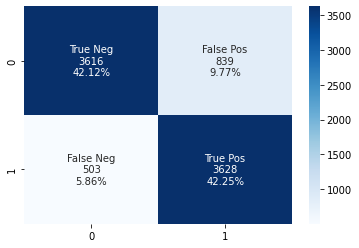

In [ ]:
## MODEL EVALUATION
predictions = model.predict(np.array(X_test), batch_size=512, verbose=0).ravel()
predictions = [1 if prob > 0.5 else 0 for prob in predictions]

# # Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

names = ['True Neg','False Pos','False Neg','True Pos']
values = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,values,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')


print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions)*100))
print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

Conclusion: The Neural Network Language Model showed a slightly worse performance for sarcasm detection accuracy of 84%.

## Google's Universal Sentence Encoder ##

In [ ]:
#LOAD GOOGLE USE MODEL
model = "https://tfhub.dev/google/universal-sentence-encoder/4"
hub_layer = hub.KerasLayer(model, output_shape=[512], input_shape=[], 
                           dtype=tf.string, trainable=True)
# print(hub_layer(np.array(X_train)[:3]))

In [ ]:
#MODEL ARCHITECTURE

model = tf.keras.models.Sequential()

model.add(hub_layer)

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_27 (Dense)            (None, 256)               131328    
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 256)               65792     
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 1)                 257       
                                                                 
Total params: 256,995,201
Trainable params: 256,995,20

In [ ]:
#TRAIN & VALIDATE MODEL
EPOCHS=100
BATCH_SIZE=128

# MODEL FIT
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      patience=10,
                                      restore_best_weights=True,
                                      verbose=1)
    
model.fit(np.array(X_train), 
          y_train, 
          validation_data=(np.array(X_valid), y_valid),
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          shuffle=True,
          callbacks=[es],
          verbose=1)

Epoch 1/100
110/110 [==============================] - 155s 1s/step - loss: 0.4357 - accuracy: 0.7904 - val_loss: 0.3159 - val_accuracy: 0.8621
Epoch 2/100
110/110 [==============================] - 30s 275ms/step - loss: 0.1377 - accuracy: 0.9485 - val_loss: 0.3280 - val_accuracy: 0.8700
Epoch 3/100
110/110 [==============================] - 18s 168ms/step - loss: 0.0157 - accuracy: 0.9957 - val_loss: 0.5241 - val_accuracy: 0.8674
Epoch 4/100
110/110 [==============================] - 19s 172ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.7145 - val_accuracy: 0.8532
Epoch 5/100
110/110 [==============================] - 16s 145ms/step - loss: 1.6331e-04 - accuracy: 1.0000 - val_loss: 0.6869 - val_accuracy: 0.8657
Epoch 6/100
110/110 [==============================] - 15s 140ms/step - loss: 6.6799e-05 - accuracy: 1.0000 - val_loss: 0.7203 - val_accuracy: 0.8662
Epoch 7/100
110/110 [==============================] - 15s 140ms/step - loss: 3.6504e-05 - accuracy: 1.0000 - val_loss

[[3911  544]
 [ 665 3466]]
Accuracy: 85.92%
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      4455
           1       0.86      0.84      0.85      4131

    accuracy                           0.86      8586
   macro avg       0.86      0.86      0.86      8586
weighted avg       0.86      0.86      0.86      8586



,0,1
0,3911,544
1,665,3466


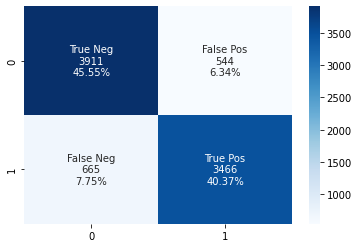

In [ ]:
## MODEL EVALUATION
predictions = model.predict(np.array(X_test), batch_size=512, verbose=0).ravel()
predictions = [1 if prob > 0.5 else 0 for prob in predictions]

# # Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

names = ['True Neg','False Pos','False Neg','True Pos']
values = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,values,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')


print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions)*100))
print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

Conclusion: Using Google's Universal Sentence Encoder, the prediction accuracy was 86% similar to the previous models.  

##BERT (Bi-directional Encoder Representations from Transformers)

In [ ]:

df = pd.read_json('./SarcasmDetect.json', lines=True)
df = df[['headline', 'is_sarcastic']]
df = df[df['headline'] != '']
df.head()

,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep. totally nails why congress is falling...,0
2,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting t...,1
4,mother comes pretty close to using word 'strea...,1


In [ ]:
# DATA SPLIT 
X=df.drop(columns=['is_sarcastic'])
y=df['is_sarcastic']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y )
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42, test_size=0.3, stratify=y_train_full)
X_train.shape, X_test.shape

((14023, 1), (8586, 1))

In [ ]:
def normalize_document(doc):
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', ' ', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()  

    return doc

def normalize_corpus(docs):
    norm_docs = []
    for doc in tqdm.tqdm(docs):
        norm_doc = normalize_document(doc)
        norm_docs.append(norm_doc)

    return norm_docs


In [ ]:
X_train= normalize_corpus(X_train['headline'].values)
X_test = normalize_corpus(X_test['headline'].values)
X_valid= normalize_corpus(X_valid['headline'].values)

100%|██████████| 6010/6010 [00:00<00:00, 58770.46it/s]


In [13]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

In [14]:
def create_bert_input_features(tokenizer, docs, max_seq_length):
    
    all_ids, all_masks, all_segments= [], [], []
    for doc in tqdm.tqdm(docs, desc="Converting docs to features"):
        
        tokens = tokenizer.tokenize(doc)
        
        if len(tokens) > max_seq_length-2:
            tokens = tokens[0 : (max_seq_length-2)]
        # with newer versions of transformers you don't need to explicitely add CLS and SEP
        # they are automatically added by the tokenizer
        tokens = ['[CLS]'] + tokens + ['[SEP]']  
        ids = tokenizer.convert_tokens_to_ids(tokens)
        masks = [1] * len(ids) # [1,1,1.....] # < 500 ones
        
        # Zero-pad up to the sequence length.
        while len(ids) < max_seq_length:
            ids.append(0)
            masks.append(0)
            
        segments = [0] * max_seq_length # [0,0,0...] # 500 zeros
        all_ids.append(ids)
        all_masks.append(masks)
        all_segments.append(segments)
        
    encoded = np.array([all_ids, all_masks, all_segments])
    
    return encoded

In [15]:
MAX_SEQ_LENGTH = 24  # This indicates the length (i.e., number) of words in each row.  

inp_id = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_input_ids")
inp_mask = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_input_masks")
inp_segment = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_segment_ids")
inputs = [inp_id, inp_mask, inp_segment]

hidden_state = transformers.TFBertModel.from_pretrained('bert-base-uncased')(inputs)
pooled_output = hidden_state[1] 

dense1 = tf.keras.layers.Dense(256, activation='relu')(pooled_output) 
drop1 = tf.keras.layers.Dropout(0.25)(dense1)
dense2 = tf.keras.layers.Dense(256, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(0.25)(dense2)

output = tf.keras.layers.Dense(1, activation='sigmoid')(drop2)

model = tf.keras.Model(inputs=inputs, outputs=output)

model.compile(optimizer=tf.optimizers.Adam(learning_rate=2e-5, 
                                           epsilon=1e-08), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 bert_input_ids (InputLayer)    [(None, 24)]         0           []                               
                                                                                                  
 bert_input_masks (InputLayer)  [(None, 24)]         0           []                               
                                                                                                  
 bert_segment_ids (InputLayer)  [(None, 24)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['bert_input_ids[0][0]',         
                                thPoolingAndCrossAt               'bert_input_masks[0][0]',   

In [16]:
train_features_ids, train_features_masks, train_features_segments = create_bert_input_features(tokenizer, 
                                                                                               X_train, 
                                                                                               max_seq_length=MAX_SEQ_LENGTH)

val_features_ids, val_features_masks, val_features_segments = create_bert_input_features(tokenizer, 
                                                                                         X_valid, 
                                                                                         max_seq_length=MAX_SEQ_LENGTH)
# test_features = create_bert_input_features(tokenizer, test_reviews, max_seq_length=MAX_SEQ_LENGTH)
# print('Train Features:', train_features_ids.shape, train_features_masks.shape, train_features_segments.shape)
# print('Val Features:', val_features_ids.shape, val_features_masks.shape, val_features_segments.shape)

Converting docs to features: 100%|██████████| 6010/6010 [00:01<00:00, 3705.44it/s]


In [17]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      patience=2,
                                      restore_best_weights=True,
                                      verbose=1)
model.fit([train_features_ids, 
           train_features_masks, 
           train_features_segments], y_train, 
          validation_data=([val_features_ids, 
                            val_features_masks, 
                            val_features_segments], y_valid),
          epochs=5, 
          batch_size=25, 
          callbacks=[es],
          shuffle=True,
          verbose=1)

Epoch 1/5
561/561 [==============================] - 166s 214ms/step - loss: 0.3617 - accuracy: 0.8368 - val_loss: 0.2953 - val_accuracy: 0.8809
Epoch 2/5
561/561 [==============================] - 108s 192ms/step - loss: 0.1792 - accuracy: 0.9317 - val_loss: 0.2295 - val_accuracy: 0.9126
Epoch 3/5
561/561 [==============================] - 106s 188ms/step - loss: 0.0856 - accuracy: 0.9678 - val_loss: 0.3005 - val_accuracy: 0.9037
Epoch 4/5
561/561 [==============================] - 105s 188ms/step - loss: 0.0436 - accuracy: 0.9852 - val_loss: 0.3562 - val_accuracy: 0.9151
Epoch 4: early stopping


In [18]:
model.save_weights('bert_ft_wts.h5')

In [19]:
test_features_ids, test_features_masks, test_features_segments = create_bert_input_features(tokenizer, 
                                                                                            X_test, 
                                                                                            max_seq_length=MAX_SEQ_LENGTH) #to compare the first and second sentence, we need to encode the ID.
print('Test Features:', test_features_ids.shape, test_features_masks.shape, test_features_segments.shape)

Converting docs to features: 100%|██████████| 8586/8586 [00:09<00:00, 928.75it/s] 

Test Features: (8586, 24) (8586, 24) (8586, 24)


In [22]:
predictions = [1 if pr > 0.5 else 0 
                   for pr in model.predict([test_features_ids, 
                                            test_features_masks, 
                                            test_features_segments], verbose=0).ravel()]

print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions)*100))
print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

Accuracy: 91.77%
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4455
           1       0.91      0.92      0.91      4131

    accuracy                           0.92      8586
   macro avg       0.92      0.92      0.92      8586
weighted avg       0.92      0.92      0.92      8586



,0,1
0,4088,367
1,340,3791


Conclusion: In comparison with the previous models, BERT showed the best accuracy score (92%) for prediction of sarcasm for newsheadline. 